In [1]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


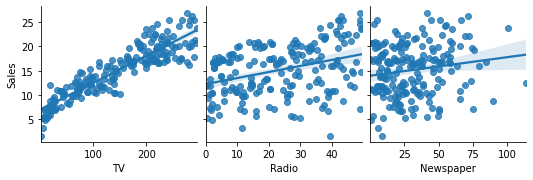

In [5]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

In [6]:
df = data
df['avg_inv'] = df.drop(['Sales'], axis=1).mean(axis='columns')

Text(0.5, 0, 'Sales')

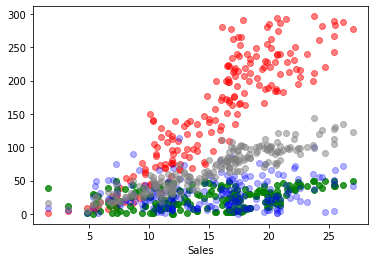

In [7]:
plt.scatter(data['Sales'],data['TV'],c="red",alpha=0.5)
plt.scatter(data['Sales'],data['Radio'],c="green",alpha=0.8)
plt.scatter(data['Sales'],data['Newspaper'],c="blue",alpha=0.3)
plt.scatter(data['Sales'],data['avg_inv'],c="gray",alpha=0.5)
plt.xlabel('Sales')

In [8]:
df.head()

,TV,Radio,Newspaper,Sales,avg_inv
0,230.1,37.8,69.2,22.1,112.366667
1,44.5,39.3,45.1,10.4,42.966667
2,17.2,45.9,69.3,12.0,44.133333
3,151.5,41.3,58.5,16.5,83.766667
4,180.8,10.8,58.4,17.9,83.333333


In [9]:
y = df['Sales']
x = df[['avg_inv']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [10]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = regression.predict(x_test)
y_pred

array([10.44576834,  9.01420214, 10.74741979, 24.516019  , 15.82436707,
        9.60727957, 11.7035015 , 18.01773099, 11.30470806, 16.94405634,
       23.26339857, 11.3098208 , 13.48784652, 16.09022936, 11.33538448,
       12.66469595, 19.54132645,  7.42925385, 13.60543946, 17.76209417,
       25.49766439, 12.65447048, 16.63729216, 14.36723718,  8.85570731,
       13.62077767, 14.80181978, 18.71306315, 17.29683516,  9.73509798,
       16.09022936, 20.68657941, 21.877847  , 20.41049164,  8.94773657,
        7.69511614, 10.78832168, 17.70585407, 12.5164266 ,  8.28308083])

In [12]:
score = regression.score(x_test, y_test)
print(score)

0.8456556633464667


In [13]:
y_pred= regression.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.2697402281440273


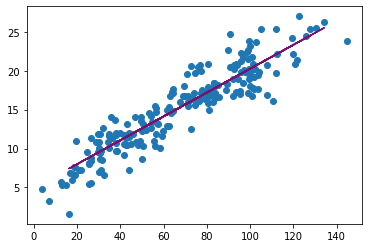

In [14]:
plt.scatter(x,y)
plt.plot(x_test,y_pred,color='#791171')

In [38]:
x = data[['TV','Radio','Newspaper']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)
score = regression.score(x_test, y_test)
print(score)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.8645053923967725
2.1266293899128947


In [42]:
score1 = regression.score(x_test,y_test)
print(score1)
print(regression.intercept_)
print(regression.coef_)

0.8645053923967725
4.773205203269841
[ 0.05368006  0.11152624 -0.00351166]


In [43]:
lasso = Lasso(alpha= 0.01)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.126463381004178


In [44]:
score2 = lasso.score(x_test,y_test)
print(score2)
print(lasso.intercept_)
print(lasso.coef_)

0.8645053923967725
4.77386736084013
[ 0.05367812  0.11146301 -0.00347491]


In [34]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
y_pred= rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.1266293252126487


In [35]:
score3 = rr.score(x_test,y_test)
print(score3)
print(rr.intercept_)
print(rr.coef_)

0.8645054006413064
4.773205854496867
[ 0.05368005  0.1115262  -0.00351165]


In [31]:
enet = ElasticNet(alpha = 0.01)
enet.fit(x_train, y_train) 
y_pred= enet.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.1265409962196093


In [32]:
score4 = enet.score(x_test,y_test)
print(score4)
print(enet.intercept_)
print(enet.coef_)

0.8645166558730818
4.773589229705221
[ 0.05367906  0.11149165 -0.00349257]


In [45]:
SGD = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.009, max_iter=10000, tol=0.01)
SGD = SGD.fit(x_train, y_train)

In [47]:
score5 = regression.score(x_test,y_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(score5)
print(regression.intercept_)
print(regression.coef_)

2.126463381004178
0.8645053923967725
4.773205203269841
[ 0.05368006  0.11152624 -0.00351166]


4.773205203269841
[ 0.05368006  0.11152624 -0.00351166]
